In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [36]:
## CSV dosyasını okuyalım
df = pd.read_csv("datasetMalware33featues.csv")


In [37]:
# Eksik verileri (NaN değerlerini) sütun ortalamalarıyla dolduralım
df.fillna(df.mean(), inplace=True)

# Eksik veri kalmış mı kontrol edelim
missing_values = df.isnull().sum()
missing_values

FinFlagDist            0
SynFlagDist            0
RstFlagDist            0
PshFlagDist            0
AckFlagDist            0
DNSoverIP              0
TCPoverIP              0
UDPoverIP              0
MaxLen                 0
MinLen                 0
StdDevLen              0
AvgLen                 0
MaxIAT                 0
MinIAT                 0
AvgIAT                 0
AvgWinFlow             0
PktsIOratio            0
1stPktLen              0
MaxLenrx               0
MinLenrx               0
StdDevLenrx            0
AvgLenrx               0
MinIATrx               0
AvgIATrx               0
NumPorts               0
FlowLEN                0
FlowLENrx              0
repeated_pkts_ratio    0
NumCon                 0
NumIPdst               0
Start_flow             0
DeltaTimeFlow          0
HTTPpkts               0
label                  0
dtype: int64

In [38]:
# Hedef değişkeni (label) ve özellikleri (features) ayırma
X = df_scaled.drop('label', axis=1)  # Özellikler
y = df_scaled['label']               # Hedef değişken

In [39]:
# Veri setini eğitim ve test setlerine ayırma(örneğin, eğitim: %70, test: %30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
# Eğitim ve test setlerinin boyutlarını kontrol etme
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24044, 33) (10305, 33) (24044,) (10305,)


In [41]:
#Normalizasyon işlemi
scaler = MinMaxScaler()

# 'label' sütunu hariç tüm sütunları ölçeklendirme
df_scaled = df.copy()
df_scaled[df_scaled.columns[:-1]] = scaler.fit_transform(df_scaled[df_scaled.columns[:-1]])

In [42]:
#RandomForestClassifier oluşturma ve eğitme
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Modelin test veri seti üzerindeki performansını değerlendirme
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     10305

    accuracy                           1.00     10305
   macro avg       1.00      1.00      1.00     10305
weighted avg       1.00      1.00      1.00     10305



In [46]:
# Modelin tahminlerini kullanarak confusion matrix oluşturma
conf_matrix = confusion_matrix(y_test, y_pred)

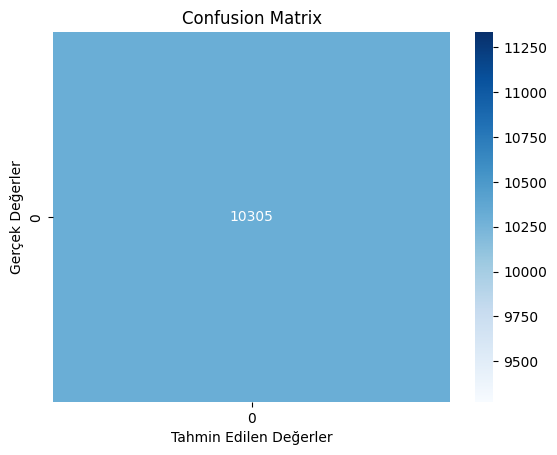

In [45]:
# Confusion matrix'i görselleştirme
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Gerçek Değerler')
plt.xlabel('Tahmin Edilen Değerler')
plt.show()